## Normalization (Min-Max Scaling)
### Normalization is a feature scaling technique that rescales data values to fit within a specific range, typically [0, 1]. It helps to ensure that all features contribute equally to the model.

# Min-Max Scaling

#### Formula:-
## X' = (X-Xmin)/(Xmax-Xmin)

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df = pd.read_csv(filepath_or_buffer=r"D:\Programming\Study\Machine Learning\Datasets\wine.csv",usecols=[0,1,2])
df.head()

,Wine,Alcohol,Malic.acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


### Visualizing Data

<Axes: ylabel='Density'>

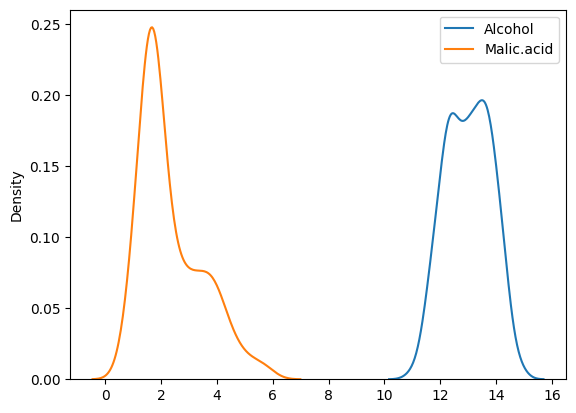

In [214]:
# fig,axis1,axis2 = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(data=df.drop("Wine",axis=1))

<Axes: xlabel='Alcohol', ylabel='Malic.acid'>

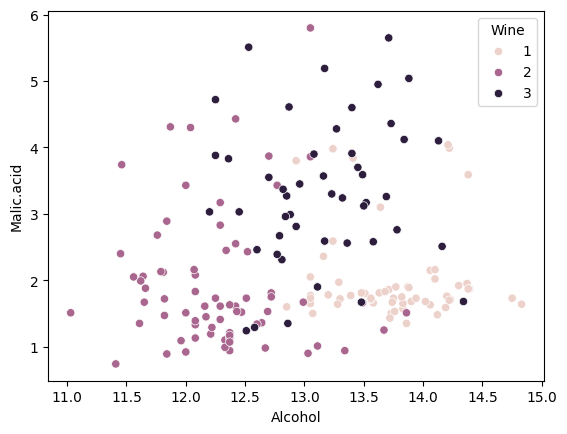

In [215]:
sns.scatterplot(data=df,x="Alcohol",y="Malic.acid",hue="Wine")

### Train-Test-Split

In [216]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop("Wine",axis=1),df["Wine"],test_size=0.3,random_state=0)

In [217]:
## Min-Max-Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ftting so that algorithm learn the data parameters like min and maximum values of variables as well 
# as tranforming training data
X_train_scaled = scaler.fit_transform(X_train)

#  Trainsforming test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Transforming Numpy array into Dataframe
X_train_scaled_df = pd.DataFrame(data=X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(data=X_test_scaled,columns=X_test.columns)

## Resetting the index
X_train_scaled_df = X_train_scaled_df.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

X_test_scaled_df = X_test_scaled_df.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [219]:
X_train.describe()

,Alcohol,Malic.acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [220]:
np.round(X_train_scaled_df.describe())

,Alcohol,Malic.acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


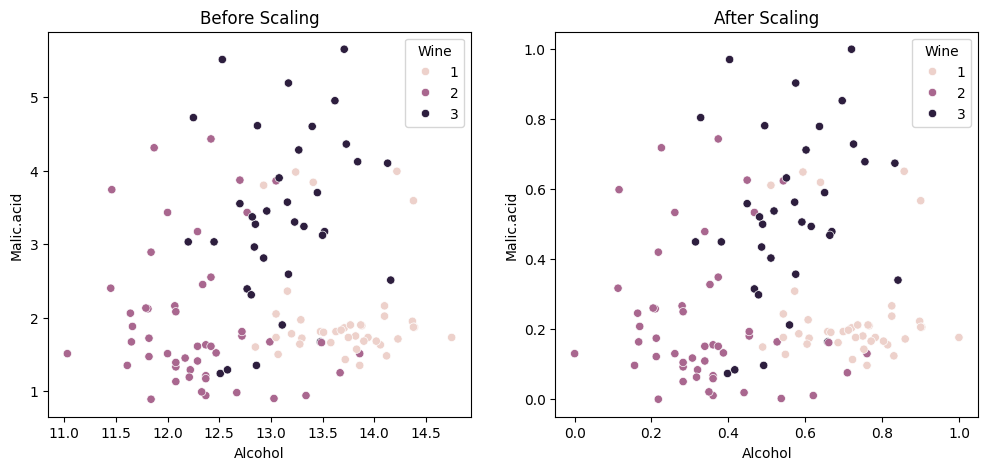

In [221]:
fig, (axis1, axis2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.scatterplot(data=X_train, x="Alcohol", y="Malic.acid", hue=Y_train, ax=axis1)
axis1.set_title("Before Scaling")

sns.scatterplot(data=X_train_scaled_df, x="Alcohol", y="Malic.acid", hue=Y_train, ax=axis2)
axis2.set_title("After Scaling")

plt.show()


#### As we can see after Normalization our data has been squased between '0' and '1'

#### 🔎 What Was the Problem?(Getting different plot of before and after)
#### The issue was caused by misaligned indexes between X_train_scaled_df and Y_train.

#### ✅ How It Happened:
#### Train-Test Split:
#### When you split the dataset using train_test_split, the original row indices are preserved.

#### Scaling:
#### When you scaled X_train using StandardScaler or MinMaxScaler, the scaling process creates a NumPy array.

#### When you converted this array back to a DataFrame (X_train_scaled_df), the index was reset to start from 0.
#### Misalignment:
#### Y_train retained the original row indices from the train-test split, while X_train_scaled_df had a fresh index starting #### from 0.

#### As a result, sns.scatterplot() failed to match the scaled data points with the correct class labels — causing missing or #### incorrect points in the plot.
#### ✅ How Resetting Fixed It:
#### By using reset_index(drop=True), both X_train_scaled_df and Y_train were aligned to start from 0 to n-1 — ensuring that #### each scaled data point matched its correct label.
#### This allowed the hue values in sns.scatterplot() to correctly assign the colors based on class labels.
#### 💡 Lesson:
#### After transforming or scaling data, always check and align indexes before plotting or training! 😎